# Feature Importance
Pracuj se stejnými daty jako na cvičení, tj. se souborem soybean-2-rot.csv.
Rozhodovací strom nám umožňuje nahlédnout do pravidel, podle kterých postupuje v klasifikaci. Díky tomu se často pokládá za velice průhledný nebo dobře interpretovatelný algoritmus.

In [31]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import requests

desired_width = 1000
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns',100)

r = requests.get(
    "https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/soybean-2-rot.csv"
)
open("soybean-2-rot.csv", "wb").write(r.content)

data = pd.read_csv("soybean-2-rot.csv")

data

,plant-stand,temp,hail,crop-hist,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leaf-shread,leaf-malf,leaf-mild,lodging,fruiting-bodies,external-decay,mycelium,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,normal,gt-norm,yes,same-lst-yr,pot-severe,fungicide,90-100,abnorm,abnorm,absent,absent,absent,absent,yes,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
1,normal,norm,no,same-lst-yr,pot-severe,fungicide,80-89,abnorm,abnorm,absent,absent,absent,absent,no,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
2,normal,norm,yes,same-lst-yr,pot-severe,none,90-100,abnorm,abnorm,absent,absent,absent,absent,yes,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
3,normal,norm,no,same-lst-sev-yrs,pot-severe,fungicide,90-100,abnorm,abnorm,absent,absent,absent,absent,yes,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
4,normal,gt-norm,yes,same-lst-yr,pot-severe,fungicide,80-89,abnorm,abnorm,absent,absent,absent,absent,yes,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,normal,norm,yes,same-lst-two-yrs,pot-severe,fungicide,80-89,norm,abnorm,absent,absent,absent,absent,yes,absent,absent,absent,norm,absent,absent,norm,absent,norm,brown-stem-rot
148,normal,norm,yes,same-lst-yr,pot-severe,none,90-100,norm,abnorm,absent,absent,absent,absent,yes,absent,absent,absent,norm,absent,absent,norm,absent,norm,brown-stem-rot
149,normal,gt-norm,yes,same-lst-two-yrs,pot-severe,fungicide,90-100,norm,abnorm,absent,absent,absent,absent,yes,absent,absent,absent,norm,absent,absent,norm,absent,norm,brown-stem-rot
150,normal,norm,yes,same-lst-yr,pot-severe,none,90-100,norm,abnorm,absent,absent,absent,absent,yes,absent,absent,absent,norm,absent,absent,norm,absent,norm,brown-stem-rot


In [3]:
X = data.drop(columns=["class"])
y = data["class"]

oh_encoder = OneHotEncoder()
X = oh_encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f1_score(y_test, y_pred, average="weighted"))

1.0


- Podívej se na atribut feature_importances_ (clf.feature_importances_), který říká, které vstupní proměnné model použil pro rozhodování. Některé budou mít nulovou hodnotu, to znamená, že vůbec potřeba nejsou. Atribut nám dá jen seznam čísel seřazený podle vstupních proměnných, ale ne jejich jména. Ty získáš například z OneHotEncoder (atribut feature_names_in_, takže například níže by se jednalo o oh_encoder.feature_names_in_)

In [4]:
clf.feature_importances_

array([0.52350127, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16218339, 0.        , 0.        ,
       0.13498863, 0.        , 0.09011917, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08920753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [5]:
features = oh_encoder.get_feature_names()[0]
features

/Users/hedvikapajerova/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'x0_lt-normal'

- Která vstupní proměnná má největší "důležitost"?

Největší "důležitost" má proměnná s názvem "x0_lt-normal".

- Stačí nám tato proměnná pro úspěšnou klasifikaci? Jaký je rozdíl mezi hodnotou f1_score při použití všech proměnných a jen této jedné "nejdůležitější" proměnné?

In [33]:
X = data[["plant-stand"]]
y = data["class"]

oh_encoder = OneHotEncoder()
X = oh_encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average="weighted")

0.7533106960950765

Tato proměnná nám pro úspěšnou klasifikaci nestačí. Hodnota f1_score je při použití všech proměnných větší cca o 0,24.

# Dobrovolný doplněk
Vykresli graf, ze kterého je vidět rozložení hodnot této jedné nejdůležitější proměnné. Můžeš využít groupby nebo pivot_table v kombinaci s metodou plot, nebo například sns.countplot (kde sns je modul seaborn).

In [20]:
plant_stand = data[["plant-stand"]]
plant_stand

,plant-stand
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
147,normal
148,normal
149,normal
150,normal


In [27]:
plant_stand_groupped = plant_stand.groupby(['plant-stand']).size()
plant_stand_groupped

plant-stand
lt-normal    99
normal       53
dtype: int64

<AxesSubplot:xlabel='plant-stand'>

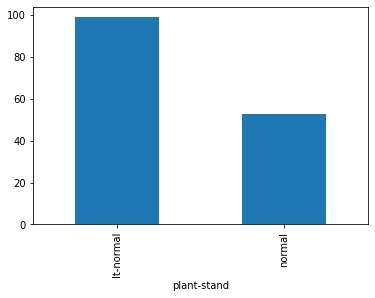

In [34]:
plant_stand_groupped.plot(kind='bar',x='name',y='age')